# Lecture 4 - Sequential Models

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

import random
import numpy as np
import numpy.random as npr

Last class we:

1. Defined a **probabilistic model**, a mathematical description to characterize *uncertainty*. A probabilistic model is the triple $(\Omega,\mathcal{F},P)$, where $\Omega$ is the sample space, $\mathcal{F}$ is the event class and $P$ is a real-valued function that maps all elements of $\mathcal{F}$ onto $\mathbb{R}$.

2. Defined **axioms of probability**:
    * $\forall E\in\mathcal{F}, P(E)\geq 0$
    * $P(\Omega)=1$
    * $\forall E, F \in \mathcal{F}, P(E\cup F) = P(E) + P(F)$ if $E$ and $F$ are mutually exclusive, that is, $E\cap F =\emptyset$
    * If $A_1,A_2,\dots$ is a sequence of event such that $A_i\cap A_j = \emptyset, \forall i\neq j$, then

$$P\left(\bigcup_{k=1}^{\infty} A_k\right) = \sum_{k=1}^{\infty} P(A_k)$$

3. Derived **corollaries** from these axioms:
    * $P(A^c) = 1 - P(A)$
    * $P(A) \leq 1$
    * $P(\emptyset) = 0 $
    * $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
    * If $A\subset B$, then $P(A)\leq P(B)$
    * If $A_1,A_2,\dots,A_n$ are pairwise mutually exclusive, then $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_k)$. Proof is by induction.
    * $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_j) - \sum_{j<k} P(A_j\cap A_k) + \dots + (-1)^{(n+1)}P(A_1\cap A_2 \cap \dots\cap A_n)$

4. Learned that an experiment is **fair** if every outcome is equally likely.

5. Defined probability as a measure of frequency of occurrence (**frequetist view**). When the sample space $\Omega$ has a finite number of equally likely outcomes, the probability of an event $E\subset \Omega$, is given by 
$$P(E) = \frac{|E|}{|\Omega|} = \frac{\text{number of elements in }E}{\text{number of elements in }\Omega}$$

# Probabilistic Models

## Discrete Sequential Models

A **sequential model** is a type of experiment that has an inherent sequential character. For example:

* Flipping a coin 3 times
* Receiving eight successive digits at a communication receiver
* Observing the value of a stock on five successive days

This type of models are also characterized by probabilistic model that must obey the set of axioms and derived corollaries we introduced last class.

It is often useful to describe a sequential model experiment in a **tree-based sequential description**. 

**Let's use the virtual whiteboard to work through some examples to demonstrate the tree-based description of this type of experiments.**

**<font color=blue>Example 1:</font>** Consider the experiment where we flip a fair coin 2 times.

* What is the sample space? Remember that different elements of the sample space should be distinct and mutually exclusive.
* What is the probability for each possible outcome?

**<font color=blue>Example 2:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$observing either a 1 or 2 on either roll.

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

**<font color=blue>Example 3:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$at least one roll is 4.

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

**<font color=blue>Example 4:</font>** Consider the experiment where we flip a fair coin 3 times and the event $E\equiv$observing heads in the 2nd flip.

* What is the sample space?
* What are the outcomes of event $E$?
* What is the probability of event $E$?

**<font color=blue>Example 5:</font>** Consider the experiment where we flip a fair coin 3 times, the sub-experiment of counting how many times is came up heads, and the event $E\equiv$it came up heads 2 times.

* What is the sample space of the experiment?
* What is the sample space of the sub-experiment?
* What are the outcomes of this sub-experiment?
* What is the probability of event $E$?

## Continuous Models

The way that continuous models differ from discrete ones is that the probabilities of single-element events may not be sufficient to characterize the probability law.

**For example:** a wheel of fortune is continuously calibrated from 0 to 1, so the possible outcomes of an experiment consisting of a single spin are the numbers in the interval $\Omega=[0,1]$. 
* Assuming a fair wheel, it is appropriate to consider all outcomes equally likely, but what is the probability of the event consisting of a single element? say 0.472927028..?
* If possible events are mutually exclusive, then using the 3rd axiom of probability (also called the **Additivity axiom**), it would follow that events with a sufficiently large number of elements would have probability larger than 1.
* Therefore, the probability of any event that consists of a single element **must** be 0.
* It makes sense then to assign a probability of $b-1$ to any sub-interval $[a,b]$ of $[0,1]$, and to calculate the probability of a more complicated set by evaluating its "length". This satisfies all axioms of probability and qualifies as a legitimate probability model.

### Coming back to Discrete Sequential Models

Let's make some simulations:

**<font color=orange>Example 1:</font>** Consider the experiment where we flip a fair coin.

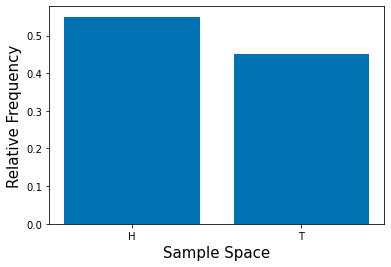

In [3]:
num_sims=100
S=['H','T']

results = random.choices(S,k=num_sims)
vals, counts = np.unique(results, return_counts=True)

plt.bar(vals, counts/num_sims)
plt.xlabel('Sample Space', fontsize=15)
plt.ylabel('Relative Frequency', fontsize=15);

**<font color=orange>Example 2, prep:</font>** Consider the experiment where we roll a 6-sided fair die and the event $E\equiv$observing a 1 or 2.

In [8]:
num_sims = 100000

die = npr.randint(1,7, size=num_sims)

print('Probability of getting a 1 or a 2 when rolling a fair 6-sided dies is ', np.sum(die<=2)/num_sims)
print('Analytical probability ',2/6)

Probability of getting a 1 or a 2 when rolling a fair 6-sided dies is  0.33244
Analytical probability  0.3333333333333333


**<font color=orange>Example 2:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$observing either a 1 or 2 on either roll.

In [11]:
num_sims=1000
event = 0

for i in range(num_sims):
    die1=random.choice(range(1,7))
    die2=random.choice(range(1,7))
    if die1<=2:
        if die2<=2:
            event+=1
            
print('Probability of getting either a 1 or a 2 on either roll is ', event/num_sims)
print('Analytical Probability ', 4/36)

Probability of getting either a 1 or a 2 on either roll is  0.106
Analytical Probability  0.1111111111111111


In [17]:
#Alternative

num_sims = 1000000
dice = npr.randint(1,7,size=(2, num_sims))

print('Pobability of rolling either a 1 or 2 on either roll is ', np.sum(np.sum(dice<=2, axis=0)==2)/num_sims)
print('Analytical probability is ',4/36)

Pobability of rolling either a 1 or 2 on either roll is  0.111839
Analytical probability is  0.1111111111111111


In [13]:
dice<=2

array([[False,  True, False, False,  True, False,  True, False,  True,
         True],
       [False,  True,  True,  True,  True, False, False, False, False,
        False]])

In [14]:
np.sum(dice<=2, axis=0)

array([0, 2, 1, 1, 2, 0, 1, 0, 1, 1])

In [15]:
np.sum(np.sum(dice<=2, axis=0)==2)

2

**<font color=orange>Example 3:</font>** Consider the experiment where we roll a 6-sided fair die 2 times and the event $E\equiv$at least one roll is 4.

In [23]:
num_sims = 10000
dice = npr.randint(1,7,size=(2,num_sims))
event = np.sum(np.sum(dice==4,axis=0)>=1)

print('Probability of getting one roll as 4 when rolling a 6-sided fair die is ',event/num_sims)
print('Analytical probability ',11/36)

Probability of getting one roll as 4 when rolling a 6-sided fair die is  0.2984
Analytical probability  0.3055555555555556


In [19]:
dice==4

array([[False, False, False, False,  True, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [20]:
np.sum(dice==4,axis=0)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [21]:
np.sum(np.sum(dice==4,axis=0)>=1)

2

**<font color=orange>Example 4:</font>** Consider the experiment where we flip a fair coin 3 times and the event $E\equiv$observing heads in the 2nd flip.

In [27]:
num_sims = 1000
coin = ['H','T']

coins = npr.randint(2, size=(3,num_sims))
event = np.sum(coins[1,:])

print('Probability of flipping a fair coin 3 times and observing heads in the 2nd flip is ',event/num_sims)
print('Analytical probability ',4/8)

Probability of flipping a fair coin 3 times and observing heads in the 2nd flip is  0.51
Analytical probability  0.5


In [25]:
coins[1,:] #python index starts at 0

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
np.sum(coins[1,:])

2

**<font color=orange>Example 5:</font>** Consider the experiment where we flip a fair coin 3 times, the sub-experiment of counting how many times is came up heads, and the event $E\equiv$it came up heads 2 times.